In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance', con=engine)

engine.dispose()
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Determine if variables are normally distributed
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.sqrt(student_df['math score']))
norm_stats = normaltest(np.sqrt(student_df['math score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(student_df["reading score"]))
norm_stats = normaltest(np.sqrt(student_df["reading score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.sqrt(student_df["writing score"]))
norm_stats = normaltest(np.sqrt(student_df["writing score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

# We can say, almost certainly that they are different

Jarque-Bera test statistics is 1233.4799726707836 and p value is 0.0
Normality test statistics is 259.4703560154713 and p value is 4.536574867826489e-57
Jarque-Bera test statistics is 88.0083349548674 and p value is 0.0
Normality test statistics is 70.4238348783534 and p value is 5.101038001506264e-16
Jarque-Bera test statistics is 141.6378240717818 and p value is 0.0
Normality test statistics is 97.39700939472482 and p value is 7.087745794883206e-22


In [4]:
student_df['reading score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading score, dtype: float64

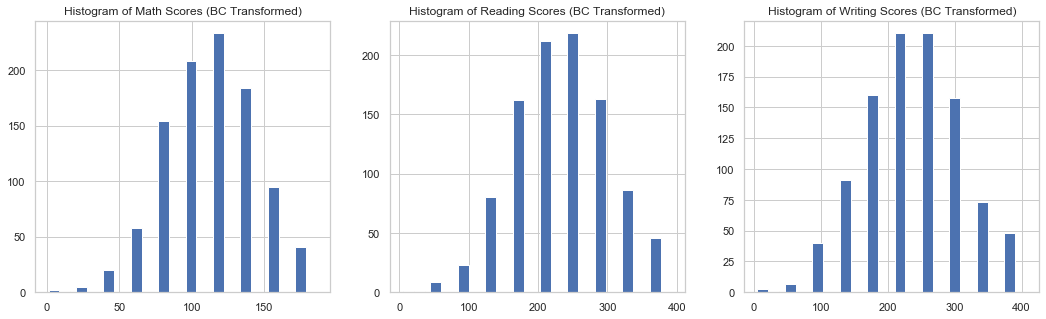

In [5]:
from scipy.stats import boxcox

student_df['math score'] = student_df['math score'].replace(0, 0.0000001)

mbc = boxcox(student_df['math score'])
rbc = boxcox(student_df['reading score'])
wbc = boxcox(student_df['writing score'])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(mbc)
plt.title('Histogram of Math Scores (BC Transformed)')

plt.subplot(1,3,2)
plt.hist(rbc)
plt.title('Histogram of Reading Scores (BC Transformed)')

plt.subplot(1,3,3)
plt.hist(wbc)
plt.title('Histogram of Writing Scores (BC Transformed)')
plt.show()

In [6]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(mbc)
norm_stats = normaltest(mbc)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(rbc)
norm_stats = normaltest(rbc)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(wbc)
norm_stats = normaltest(wbc)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

ValueError: operands could not be broadcast together with shapes (2,) (1000,) 

In [7]:
student_df['avg score'] = (student_df['math score'] + student_df['reading score'] + student_df['writing score'])/3
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667
1,female,group C,some college,standard,completed,69.0,90,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333
4,male,group C,some college,standard,none,76.0,78,75,76.333333


In [8]:
jb_stats = jarque_bera(np.sqrt(student_df['avg score']))
norm_stats = normaltest(np.sqrt(student_df['avg score']))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 187.71355173975104 and p value is 0.0
Normality test statistics is 112.45120503444764 and p value is 3.8153210186343066e-25
